In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
# Can download the various CSV files from
# https://epyc.astro.washington.edu/~lynnej/opsim_downloads/

In [4]:
# If you want to read a subset of the metrics .. do this and then comment out the csv files you don't want
release = ['1.4', '1.5', '1.6']
sci = {}
meta = {}
sso_disc = {}
sso_char = {}
allcomp = {}
nvisits = {}
for r in release:
    sci[r] = pd.read_csv(os.path.join('science_comp', f'sci_summary_{r.replace(".", "_")}.csv'), index_col=0)
    meta[r] = pd.read_csv(os.path.join('meta_comp', f'meta_summary_{r.replace(".", "_")}.csv'), index_col=0)
    sso_disc[r] = pd.read_csv(os.path.join('sso_comp', f'discovery_{r}.csv'), index_col=0)
    sso_char[r] = pd.read_csv(os.path.join('sso_comp', f'characterization_{r}.csv'), index_col=0)
    nvisits[r] = pd.read_csv(os.path.join('meta_comp', f'nvisits_{r}.csv'), index_col=0)
# Join dataframes. Indexes out of order, so match.
big = {}
for r in release:
    big[r] = sci[r].join(meta[r], how='left', lsuffix='', rsuffix='_m')
    big[r] = big[r].join(nvisits[r], how='left')
    big[r] = big[r].join(sso_disc[r], how='left')
    big[r] = big[r].join(sso_char[r], how='left')
    print(big[r].shape)    

(118, 5785)
(86, 5789)
(30, 5771)


In [6]:
# or just read the 'big' files
release = ['1.4', '1.5', '1.6']
big = {}
for r in release:
    big[r] = pd.read_csv(f'big_{r}.csv', index_col=0)
    print(big[r].shape)

(118, 5785)
(86, 5789)
(30, 5771)


In [7]:
big['1.6'][0:3]

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,Rms Parallax Error @ 22.4 All visits HealpixSlicer,...,FractionPop 6 of ugrizy PHA H=16.0,FractionPop 6 of ugrizy PHA H=19.0,FractionPop Lightcurve Inversion NEO H=16.0,FractionPop Lightcurve Inversion NEO H=19.0,FractionPop Lightcurve Inversion MBA H=16.0,FractionPop Lightcurve Inversion MBA H=18.0,FractionPop Lightcurve Inversion Trojan H=14.0,FractionPop Lightcurve Inversion Trojan H=15.0,FractionPop Lightcurve Inversion PHA H=16.0,FractionPop Lightcurve Inversion PHA H=19.0
barebones_nexp2_v1.6_10yrs,18405.709639,1.022539,1067.0,990.0,1.293333,1.200000,2.074872,4.292548,2.751396,7.057977,...,0.4224,0.0482,0.4372,0.0706,0.933387,0.142228,0.9768,0.0850,0.4158,0.0680
barebones_v1.6_10yrs,18518.174988,1.028787,1155.0,1074.0,1.400000,1.301818,1.912236,4.015585,2.485906,4.506423,...,0.4754,0.0636,0.4706,0.0876,0.949190,0.192438,0.9922,0.1674,0.4382,0.0898
baseline_nexp1_v1.6_10yrs,18210.154220,1.011675,972.0,902.0,1.178182,1.093333,2.098163,9.594737,4.320048,14.024941,...,0.4518,0.0524,0.5200,0.0754,0.983397,0.223445,0.9954,0.2618,0.5056,0.0768


In [8]:
# I found this useful to identify groups of runs 'families' to analyze together
# Note that different families may find using a different 'baseline' comparison point useful
# And FBS 1.4 should always be compared to baseline_v1.4_10yrs (not other releases directly)
# Same with FBS 1.5 and 1.6 -- analysis should stay within the same release

baselinesR = {'baseline_v1.4_10yrs': '1.4',
            'baseline_v1.5_10yrs': '1.5',
            'baseline_nexp1_v1.6_10yrs': '1.6'}

families = {}
baselines = {}


families['visittime'] = ['baseline_v1.5_10yrs',
                         'baseline_2snaps_v1.5_10yrs',
                         'u60_v1.5_10yrs',
                         'var_expt_v1.5_10yrs']
baselines['visittime'] = 'baseline_v1.5_10yrs'


families['intranight'] = [ 'baseline_2snaps_v1.5_10yrs', 
 'baseline_v1.5_10yrs', 
 'baseline_samefilt_v1.5_10yrs',
 'third_obs_pt15v1.5_10yrs', 
 'third_obs_pt30v1.5_10yrs', 
 'third_obs_pt45v1.5_10yrs', 
 'third_obs_pt60v1.5_10yrs', 
 'third_obs_pt90v1.5_10yrs', 
 'third_obs_pt120v1.5_10yrs']
baselines['intranight'] = 'baseline_v1.5_10yrs'

families['footprint'] = ['filterdist_indx2_v1.5_10yrs', 
                         'baseline_v1.5_10yrs',
                         'footprint_standard_goalsv1.5_10yrs',
                         'footprint_bluer_footprintv1.5_10yrs', 
                         'footprint_no_gp_northv1.5_10yrs',
                         'footprint_gp_smoothv1.5_10yrs',
                         'footprint_add_mag_cloudsv1.5_10yrs',
                         'footprint_big_sky_dustv1.5_10yrs',
                          'footprint_big_skyv1.5_10yrs',
                         'footprint_big_sky_nouiyv1.5_10yrs',
                         'footprint_big_wfdv1.5_10yrs',
                          'footprint_newAv1.5_10yrs',
                         'footprint_newBv1.5_10yrs',
                         'bulges_bs_v1.5_10yrs',
                         'bulges_cadence_bs_v1.5_10yrs',
                         'bulges_bulge_wfd_v1.5_10yrs',
                         'bulges_cadence_bulge_wfd_v1.5_10yrs',
                         'bulges_cadence_i_heavy_v1.5_10yrs',
                         'bulges_i_heavy_v1.5_10yrs',
                        ]
baselines['footprint'] = 'baseline_v1.5_10yrs'

families['filterchoice'] =  ['filterdist_indx1_v1.5_10yrs',
     'filterdist_indx2_v1.5_10yrs',
     'filterdist_indx3_v1.5_10yrs',
     'filterdist_indx4_v1.5_10yrs',
     'filterdist_indx5_v1.5_10yrs',
     'filterdist_indx6_v1.5_10yrs',
     'filterdist_indx7_v1.5_10yrs',
     'filterdist_indx8_v1.5_10yrs',]
baselines['filterchoice'] = 'filterdist_indx2_v1.5_10yrs'

families['rolling'] = ['rolling_fpo_2nslice0.8_v1.6_10yrs',
 'rolling_fpo_2nslice0.9_v1.6_10yrs',
 'rolling_fpo_2nslice1.0_v1.6_10yrs',
 'rolling_fpo_3nslice0.8_v1.6_10yrs',
 'rolling_fpo_3nslice0.9_v1.6_10yrs',
 'rolling_fpo_3nslice1.0_v1.6_10yrs',
 'rolling_fpo_6nslice0.8_v1.6_10yrs',
 'rolling_fpo_6nslice0.9_v1.6_10yrs',
 'rolling_fpo_6nslice1.0_v1.6_10yrs',
 'baseline_nexp1_v1.6_10yrs']
baselines['rolling'] = 'baseline_nexp1_v1.6_10yrs'

families['twilight'] = ['twilight_neo_mod1_v1.5_10yrs',
 'twilight_neo_mod2_v1.5_10yrs',
 'twilight_neo_mod3_v1.5_10yrs',
 'twilight_neo_mod4_v1.5_10yrs',
 'baseline_v1.5_10yrs']
baselines['twilight'] = 'baseline_v1.5_10yrs'

families['upairs'] = ['uparis_illum_15_scale1v1.4_10yrs',
 'uparis_illum_15_scale2v1.4_10yrs',
 'uparis_illum_15_scale4v1.4_10yrs',
 'uparis_illum_30_scale1v1.4_10yrs',
 'uparis_illum_30_scale2v1.4_10yrs',
 'uparis_illum_30_scale4v1.4_10yrs',
 'uparis_illum_40_scale1v1.4_10yrs',
 'uparis_illum_40_scale2v1.4_10yrs',
 'uparis_illum_40_scale4v1.4_10yrs',
 'uparis_illum_60_scale1v1.4_10yrs',
 'uparis_illum_60_scale2v1.4_10yrs',
 'uparis_illum_60_scale4v1.4_10yrs',
 'baseline_v1.4_10yrs']
baselines['upairs'] = 'baseline_v1.4_10yrs'

families['wfdscale'] = ['wfd_depth_scale0.65_noddf_v1.5_10yrs',
                    'wfd_depth_scale0.70_noddf_v1.5_10yrs', 
                    'wfd_depth_scale0.75_noddf_v1.5_10yrs',
                    'wfd_depth_scale0.80_noddf_v1.5_10yrs',
                    'wfd_depth_scale0.85_noddf_v1.5_10yrs',
                    'wfd_depth_scale0.90_noddf_v1.5_10yrs',
                    'wfd_depth_scale0.95_noddf_v1.5_10yrs',
                    'wfd_depth_scale0.99_noddf_v1.5_10yrs',
                   'baseline_v1.5_10yrs']
baselines['wfdscale'] = 'baseline_v1.5_10yrs'

families['alt_dust'] = ['alt_dust_v1.5_10yrs', 
                        'alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs', 
                        'baseline_v1.5_10yrs']
baselines['alt_dust'] = 'baseline_v1.5_10yrs'

families['minisurveys'] = ['short_exp_2ns_1expt_v1.5_10yrs',
                            'short_exp_2ns_5expt_v1.5_10yrs',
                            'short_exp_5ns_1expt_v1.5_10yrs',
                            'short_exp_5ns_5expt_v1.5_10yrs',
                           'twilight_neo_mod1_v1.5_10yrs',
                           'twilight_neo_mod2_v1.5_10yrs',
                           'twilight_neo_mod3_v1.5_10yrs',
                           'twilight_neo_mod4_v1.5_10yrs',
                            'dcr_nham1_ug_v1.5_10yrs',
                           'dcr_nham1_ugr_v1.5_10yrs',
                           'dcr_nham1_ugri_v1.5_10yrs',
                           'dcr_nham2_ug_v1.5_10yrs',
                           'dcr_nham2_ugr_v1.5_10yrs',
                           'dcr_nham2_ugri_v1.5_10yrs',
                           'baseline_v1.5_10yrs'
                          ]
baselines['minisurveys'] = 'baseline_v1.5_10yrs'

families['shortexp'] = ['short_exp_2ns_1expt_v1.5_10yrs',
                        'short_exp_2ns_5expt_v1.5_10yrs',
                        'short_exp_5ns_1expt_v1.5_10yrs',
                        'short_exp_5ns_5expt_v1.5_10yrs',
                       'baseline_v1.5_10yrs']
baselines['shortexp'] = 'baseline_v1.5_10yrs'

families['dcr'] = ['dcr_nham1_ug_v1.5_10yrs',
                   'dcr_nham1_ugr_v1.5_10yrs',
                   'dcr_nham1_ugri_v1.5_10yrs',
                   'dcr_nham2_ug_v1.5_10yrs',
                   'dcr_nham2_ugr_v1.5_10yrs',
                   'dcr_nham2_ugri_v1.5_10yrs',
                  'baseline_v1.5_10yrs']
baselines['dcr'] = 'baseline_v1.5_10yrs'

families['u60'] = ['u60_v1.5_10yrs',
                   'baseline_v1.5_10yrs']
baselines['u60'] = 'baseline_v1.5_10yrs'

families['var_expt'] = ['var_expt_v1.5_10yrs',
                       'baseline_v1.5_10yrs']
baselines['var_expt'] = ['baseline_v1.5_10yrs']

families['spiders'] = ['spiders_v1.5_10yrs', 'baseline_v1.5_10yrs']
baselines['spiders'] = 'baseline_v1.5_10yrs'

families['greedy'] = ['greedy_footprint_v1.5_10yrs',
                     'baseline_v1.5_10yrs']
baselines['greedy'] = 'baseline_v1.5_10yrs'

families['ddf'] = ['agnddf_v1.5_10yrs',
                  'descddf_v1.5_10yrs',
                  'daily_ddf_v1.5_10yrs',
                  'baseline_v1.5_10yrs']
baselines['ddf'] = 'baseline_v1.5_10yrs'

families['v16'] = ['barebones_nexp2_v1.6_10yrs',
                   'barebones_v1.6_10yrs',
                   'baseline_nexp2_scaleddown_v1.6_10yrs',
                   'baseline_nexp2_v1.6_10yrs',
                   'baseline_nexp1_v1.6_10yrs',
                   'combo_dust_nexp2_v1.6_10yrs',
                   'combo_dust_v1.6_10yrs',
                   'ddf_heavy_nexp2_v1.6_10yrs',
                   'ddf_heavy_v1.6_10yrs',
                   'dm_heavy_nexp2_v1.6_10yrs',
                   'dm_heavy_v1.6_10yrs',
                   'mw_heavy_nexp2_v1.6_10yrs',
                   'mw_heavy_v1.6_10yrs',
                   'rolling_exgal_mod2_dust_sdf_0.80_nexp2_v1.6_10yrs',
                   'rolling_exgal_mod2_dust_sdf_0.80_v1.6_10yrs',
                   'ss_heavy_nexp2_v1.6_10yrs',
                   'ss_heavy_v1.6_10yrs']
baselines['v16'] = 'baseline_nexp1_v1.6_10yrs'


In [11]:
# You could pull out additional run names, especially if you know part of the pattern by:
r = '1.5'
[run for run in big[r].index.values if "baseline" in run]

['baseline_samefilt_v1.5_10yrs',
 'baseline_v1.5_10yrs',
 'baseline_2snaps_v1.5_10yrs']

In [12]:
# Some utility functions for normalizing the dataframes to their relevant baseline and to plot

def norm_df(df, norm_run,
            invert_cols=None, reverse_cols=None, mag_cols=None):
    """
    Normalize values in a dataframe to a given column
    """
    out_df = df.copy()
    if reverse_cols is not None:
        out_df[reverse_cols] = -out_df[reverse_cols]
    if invert_cols is not None:
        out_df[invert_cols] = 1/out_df[invert_cols]
    if mag_cols is not None:
        out_df[mag_cols] = 1 + out_df[mag_cols] - out_df[mag_cols].loc[norm_run]
    else:
        mag_cols = []
    cols = [c for c in df.columns.values if c not in mag_cols]
    out_df[cols] = 1 + (out_df[cols] - out_df[cols].loc[norm_run])/out_df[cols].loc[norm_run]
    return out_df

def plot(d, normed=True, style=None, figsize=(10, 5)):
    d.plot(figsize=figsize, style=style)
    plt.legend(loc=(1.01, 0))
    if normed:
        plt.axhline(0.95, alpha=0.3, linestyle=':')
        plt.axhline(1.0, alpha=0.3, linestyle='--')
        plt.axhline(1.05, alpha=0.3, linestyle=':')
    xnames = d.index.values
    xi = np.arange(len(xnames))
    plt.xticks(xi, xnames, rotation=90, fontsize='large')
    plt.grid('k:', alpha=0.3)
    plt.tight_layout()

In [13]:
# Metrics -- it can be useful to group these together as well. 
# This is a subset of metrics from different science areas.
# This is a bit messy and could be more convenient in the future, but mostly works. 

metrics = {}  # Full names of summary metrics
short_names = {}  # Short display (legend) names of summary metrics
short_names_norm = {}  # Short names to use in the legend, if the metric values are normalized 
invert_cols = {}  # Any metrics to invert in the dataframe? (so that larger = better)
mags_cols = {}    # Any metrics which report in magnitudes? (so that we don't divide but subtract when normalizing)
styles = {}   # .. make the plots look pretty by color and line-styling the lines

metrics['srd'] = ['fONv MedianNvis fO All visits HealpixSlicer', 
       'Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer',
       'Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer',
       'Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer',
       'Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All visits HealpixSlicer',
      ]
short_names['srd'] = ['fONv MedianNvis',
                     'Med Parallax Error @22.4',
                     'Med Parallax Error @24.0',
                      'Med PM Error @20.5',
                      'Med PM Error @24.0']
short_names_norm['srd'] = ['fONv MedianNvis',
                           '1 / Med Parallax Error @22.4',
                     '1 / Med Parallax Error @24.0',
                      '1 / Med PM Error @20.5',
                      '1 /Med PM Error @24.0']
invert_cols['srd'] = ['Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer',
              'Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer',
              'Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All visits HealpixSlicer',
              'Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All visits HealpixSlicer',]
styles['srd'] = ['k-', 'c-', 'c:', 'r-', 'r:']

metrics['Nvis'] = ['Nvisits All', 
        'Nvisits Long Exp', 
        'Nvisits Long WFD',
        'OpenShutterFraction All visits',
        'Mean NVisits u band HealpixSlicer',
        'Mean NVisits g band HealpixSlicer',
        'Mean NVisits r band HealpixSlicer',
        'Mean NVisits i band HealpixSlicer',
        'Mean NVisits z band HealpixSlicer',
        'Mean NVisits y band HealpixSlicer',
       ]
short_names['Nvis'] = ['Nvisits (all)', 'Nvisits (long exp)', 'Nvisits (long exp WFD)',
                       'OpenShutterFraction', 
                      'Mean Nvisits u', 'Mean Nvisits g', 'Mean Nvisits r' ,
                      'Mean Nvisits i', 'Mean Nvisits z', 'Mean Nvisits y', ]
mags_cols['Nvis'] = None
styles['Nvis'] = ['b-.', 'b-', 'r-.', 'g--', 'c:', 'g:', 'y:', 'r:', 'm:', 'k:']

metrics['cadence'] = [
       'Median Median Intra-Night Gap  HealpixSlicer',
       'Mean Median Inter-Night Gap u band HealpixSlicer',
       'Mean Median Inter-Night Gap r band HealpixSlicer',
       'Mean Median Inter-Night Gap y band HealpixSlicer',
         #  'Mean Median Season Length all bands HealpixSlicer', Seasonlength has issues in 1.5
      ]
short_names['cadence'] = ['Intra-Night Gap', 
                      'Inter-Night Gap u',
                      'Inter-Night Gap r',
                       'Inter-Night Gap y',
                      #    'Season Length',
                      ]
short_names_norm['cadence'] = ['1 / Intra-Night Gap', 
                      '1 / Inter-Night Gap u',
                      '1 / Inter-Night Gap r',
                       '1 / Inter-Night Gap y',
                      #'1 / Season Length',
                      ]
invert_cols['cadence'] = ['Median Median Intra-Night Gap  HealpixSlicer',
       'Mean Median Inter-Night Gap u band HealpixSlicer',
       'Mean Median Inter-Night Gap r band HealpixSlicer',
       'Mean Median Inter-Night Gap y band HealpixSlicer',
       #'Mean Median Season Length all bands HealpixSlicer',
                         ]
styles['cadence']  = ['b:', 'c--', 'r--', 'k--',] # 'g-.']

metrics['tvs'] = ['Mean PeriodDetection P_0.5_Mag_21_Amp_0.05-0.1-1 HealpixSlicer',
       #'Mean PeriodDetection P_1.0_Mag_21_Amp_0.05-0.1-1 HealpixSlicer',
       #'Mean PeriodDetection P_2.0_Mag_21_Amp_0.05-0.1-1 HealpixSlicer',
       'Fast Microlensing  UserPointsSlicer',
       #'Slow Microlensing  UserPointsSlicer',
       #'KN_Detected  UserPointsSlicer',
       #'KN_PrePeak  UserPointsSlicer',
       #'KN_WellSampled  UserPointsSlicer',
       #'TDEsPopMetric__prepeak  UserPointsSlicer',
       #'TDEsPopMetric__some_color  UserPointsSlicer',
       'TDEsPopMetric__some_color_pu  UserPointsSlicer',
       #'SNIa_Detected non-DD UserPointsSlicer', 
       'SNIa_PrePeak non-DD UserPointsSlicer',
       'SNIa_WellSampled non-DD UserPointsSlicer',
       'N stars to Precision 0.20  r HealpixSlicer',
       'N stars to Precision 0.20  y HealpixSlicer']
short_names['tvs'] = ['Mean PeriodDetection P=0.5 days',
                     #'Mean PeriodDetection P=1.0 days', 
                     #'Mean PeriodDetection P=2.0 days', 
                     'Fast microlensing',
                     #'Slow microlensing', 
                     #'KN Detected', 'KN PrePeak', 'KN WellSampled',
                     #'TDE PrePeak', 'TDE AnyColor', 
                      'TDE AnyColor + u',
                     #'SNIa Detected', 
                      'SNIa PrePeak', 'SNIa WellSampled',
                     'Nstars Precision<0.2mag r', 'Nstars Precision<0.2mag y']
styles['tvs'] = ['k-', 'c-', 'b:', 'g:', 'g--', 'm--', 'r--']

metrics['descWFD'] = ['Median ExgalM5_with_cuts fiveSigmaDepth, filter i band non-DD year 10 HealpixSlicer',
           'Rms ExgalM5_with_cuts fiveSigmaDepth, filter i band non-DD year 10 HealpixSlicer',
           'Effective Area (deg) ExgalM5_with_cuts fiveSigmaDepth, filter i band non-DD year 10 HealpixSlicer',
           '3x2ptFoM ExgalM5_with_cuts fiveSigmaDepth, filter i band non-DD year 10 HealpixSlicer',
           'N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer',
           'Mean WeakLensingNvisits fiveSigmaDepth, visitExposureTime i band non-DD HealpixSlicer',
          ]
short_names['descWFD'] = ['Median coaddedM5 i band',
                          'RMS coaddedM5 i band',
                          'Effective survey area',
                          '3x2pt FoM',
                          'NGal in exgal footprint',
                          'Mean NVisits (WL)']
short_names_norm['descWFD']  = ['Median coaddedM5 i band',
                          '1 / RMS coaddedM5 i band',
                          'Effective survey area',
                          '3x2pt FoM',
                          'NGal in exgal footprint',
                          'Mean NVisits (WL)']
invert_cols['descWFD'] = ['Rms ExgalM5_with_cuts fiveSigmaDepth, filter i band non-DD year 10 HealpixSlicer']
mags_cols['descWFD'] = ['Median ExgalM5_with_cuts fiveSigmaDepth, filter i band non-DD year 10 HealpixSlicer']
styles['descWFD'] = ['b-.', 'b:', 'b-', 'r-.', 'm:', 'g-']

metrics['galaxies'] = ['N Galaxies (all) GalaxyCountsMetric_extended i band HealpixSlicer']
short_names['galaxies'] = ['NGal all sky']

metrics['sso'] = ['3 pairs in 15 nights detection loss PHA H=16.0',
               '3 pairs in 15 nights detection loss PHA H=22.0',
               '3 pairs in 15 nights detection loss NEO H=16.0',
               '3 pairs in 15 nights detection loss NEO H=22.0',
               '3 pairs in 15 nights detection loss MBA H=16.0',
               '3 pairs in 15 nights detection loss MBA H=21.0',
               '3 pairs in 15 nights detection loss Trojan H=14.0',
               '3 pairs in 15 nights detection loss Trojan H=18.0',
               '3 pairs in 15 nights detection loss TNO H=4.0',
               '3 pairs in 15 nights detection loss TNO H=8.0',]
short_names['sso'] = ['Completeness PHA H<16.0',
               'Completeness PHA H<22.0',
               'Completeness NEO H<16.0',
               'Completeness NEO H<22.0',
               'Completeness MBA H<16.0',
               'Completeness MBA H<21.0',
               'Completeness Trojan H<14.0',
               'Completeness Trojan H<18.0',
               'Completeness TNO H<4.0',
               'Completeness TNO H<8.0',]
styles['sso'] = ['g-','g--', 'b-', 'b--', 'y-', 'y--', 'c-', 'c--', 'r-', 'r--']

# Make these dictionary keys exist for everything
for m in metrics:
    if m not in invert_cols:
        invert_cols[m] = None
    if m not in mags_cols:
        mags_cols[m] = None
    if m not in styles:
        styles[m] = None
    if m not in short_names_norm:
        short_names_norm[m] = short_names[m]

In [25]:
# And you could pull out new metrics/names like this ..
r = '1.5'
[m for m in big[r].columns.values if 'Parallax Error' in m and 'Median' in m and '_m' not in m]

['Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer',
 'Median Parallax Error @ 22.4 All visits HealpixSlicer',
 'Median Parallax Error (18k) Parallax Error @ 24.0 All visits HealpixSlicer',
 'Median Parallax Error @ 24.0 All visits HealpixSlicer',
 'Median Parallax Error (18k) Parallax Error @ 22.4 WFD HealpixSlicer',
 'Median Parallax Error @ 22.4 WFD HealpixSlicer',
 'Median Parallax Error (18k) Parallax Error @ 24.0 WFD HealpixSlicer',
 'Median Parallax Error @ 24.0 WFD HealpixSlicer']

In [15]:
# For the SRD metrics, I want a cutoff line for the fO metric where it fails SRD requirements
def fO_cutoff(r, family):
    srd_fO_cutoff = big[r]['fONv MedianNvis fO All visits HealpixSlicer'].loc[baselines[family]]
    srd_fO_cutoff = 825 / srd_fO_cutoff 
    return srd_fO_cutoff

r = '1.5'
fO_cutoff(r, 'visittime')

0.8531540847983454

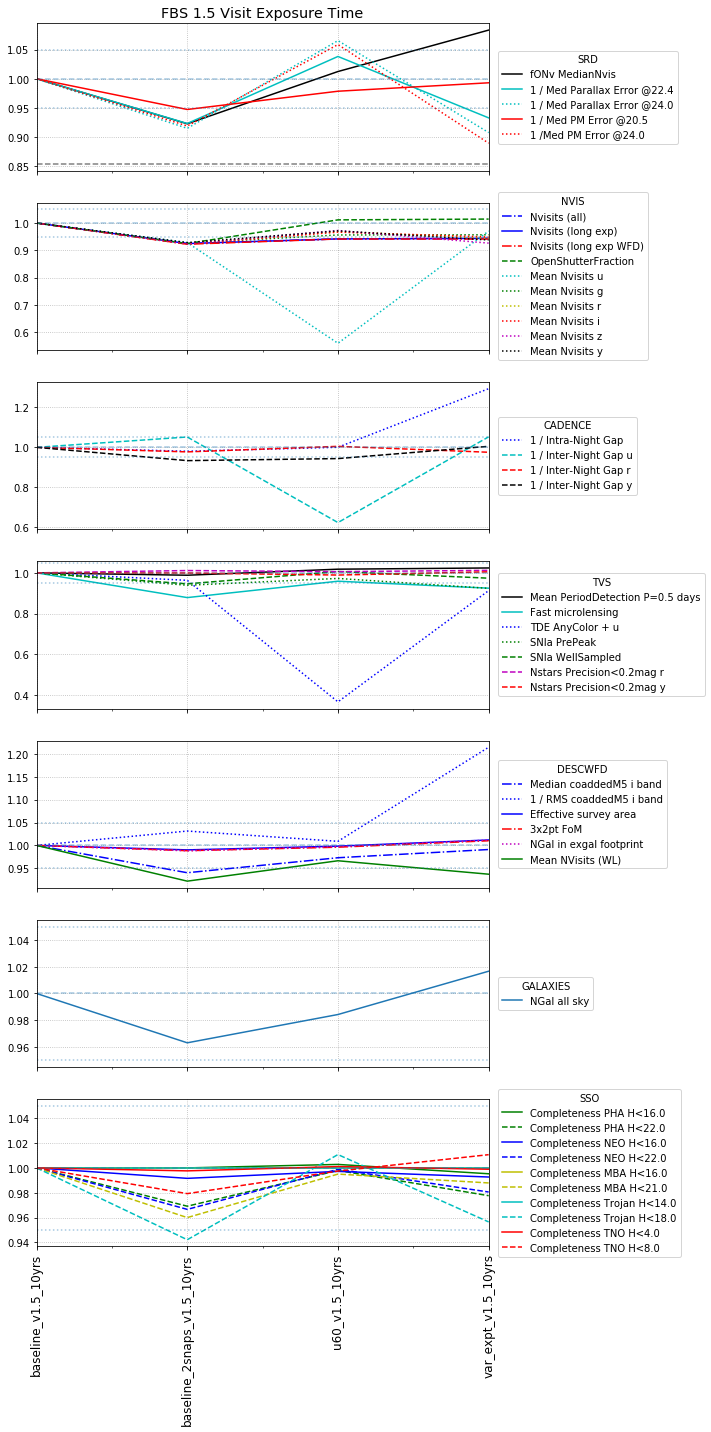

In [16]:
# So here is an example of plotting all subsets of metrics across the 'visittime' family
family = 'visittime'

r = baselinesR[baselines[family]]
srd_fO_cutoff = fO_cutoff(r, family)

plt.figure(figsize=(10, 20))
i = 1
sharex = None
for mset in metrics:
    d = norm_df(big[r][metrics[mset]].loc[families[family]], baselines[family],
                invert_cols=invert_cols[mset], mag_cols=mags_cols[mset])
    d.columns = short_names_norm[mset]
    
    ax = plt.subplot(len(metrics), 1, i, sharex=sharex)
    d.plot(ax=ax, style=styles[mset])
    plt.legend(loc='center left', bbox_to_anchor=(1.01, 0., .9, 1), fancybox=True,
               title=f'{mset.upper()}')
    plt.axhline(0.95, alpha=0.4, linestyle=':')
    plt.axhline(1.0, alpha=0.4, linestyle='--')
    plt.axhline(1.05, alpha=0.4, linestyle=':')
    if mset == 'srd':
        plt.axhline(srd_fO_cutoff, color='k', linestyle='--', alpha=0.5)
    ylims = plt.ylim()
    if ylims[0] > 0.95: 
        ylim[0] = 0.95
    if ylims[1] < 1.05:
        ylim[0] = 1.05
    plt.grid(True, color='k', linestyle=':', alpha=0.3)
    if i == 1:
        plt.title(f'FBS {r} Visit Exposure Time', fontsize='x-large')
        sharex = ax
    i += 1
xnames = d.index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.tight_layout()

#plt.savefig('visit_exp_time.pdf')

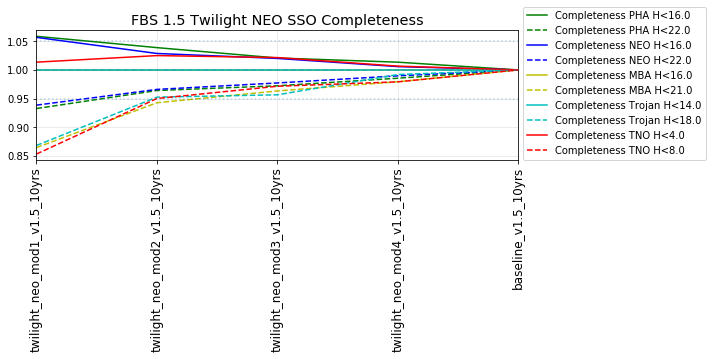

In [18]:
# And here is an example of plotting just a single subset of summary metrics
mset = 'sso'
family = 'twilight'
titlem = 'SSO Completeness'

r = baselinesR[baselines[family]]

d = norm_df(big[r][metrics[mset]].loc[families[family]], baselines[family],
            invert_cols=invert_cols[mset], mag_cols=mags_cols[mset])
d.columns = short_names[mset]
plot(d, normed=True, style=styles[mset], figsize=(10, 5))

plt.title(f'FBS {r} Twilight NEO {titlem}', fontsize='x-large')
plt.tight_layout()
#plt.savefig(f'{mset}_{family}.pdf')

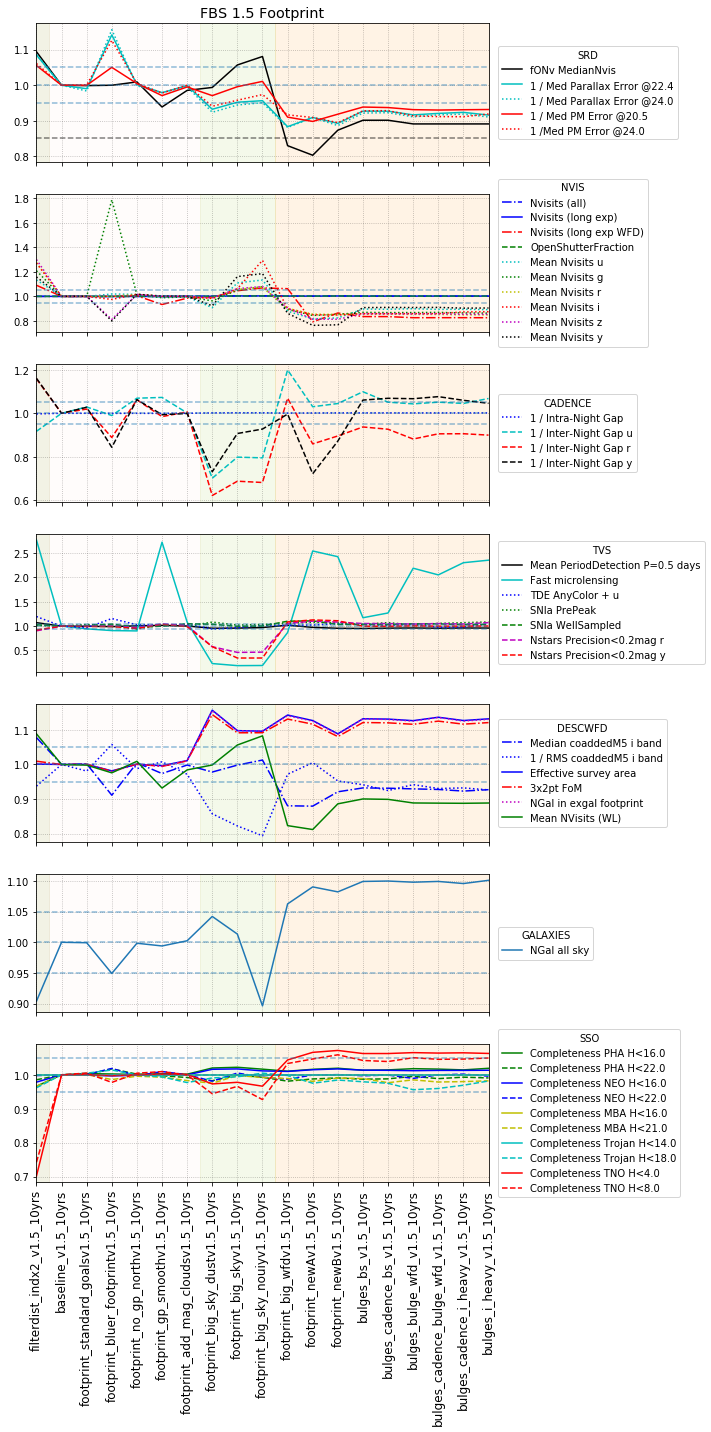

In [20]:
# And here is a fancier example of plotting all metrics for a set of runs, while also shading some of the columns
# I split the columns/groups of runs depending on the similarities of the footprint

family = 'footprint'

r = baselinesR[baselines[family]]
srd_fO_cutoff = fO_cutoff(r, family)

plt.figure(figsize=(10, 20))
i = 1
sharex = None
for mset in metrics:
    d = norm_df(big[r][metrics[mset]].loc[families[family]], baselines[family],
                invert_cols=invert_cols[mset], mag_cols=mags_cols[mset])
    d.columns = short_names_norm[mset]
    
    ax = plt.subplot(len(metrics), 1, i, sharex=sharex)
    d.plot(ax=ax, style=styles[mset])
    plt.legend(loc='center left', bbox_to_anchor=(1.01, 0., .9, 1), fancybox=True,
               title=f'{mset.upper()}')
    plt.axhline(0.95, alpha=0.5, linestyle='--')
    plt.axhline(1.0, alpha=0.5, linestyle='--')
    plt.axhline(1.05, alpha=0.5, linestyle='--')
    if mset == 'srd':
        plt.axhline(srd_fO_cutoff, color='k', linestyle='--', alpha=0.5)
    ylims = plt.ylim()
    if ylims[0] > 0.95: 
        ylim[0] = 0.95
    if ylims[1] < 1.05:
        ylim[0] = 1.05
    plt.ylim(ylims)
    plt.grid(True, color='k', linestyle=':', alpha=0.3)
    # for footprints, let's add shading for similar kinds of footprints
    plt.fill_between([0, 0.5], ylims[0], ylims[1], alpha=0.1, color='olive')
    plt.fill_between([0.5, 6.5], ylims[0], ylims[1], alpha=0.1, color='mistyrose')
    plt.fill_between([6.5, 9.5], ylims[0], ylims[1], alpha=0.1, color='yellowgreen')
    plt.fill_between([9.5, 18], ylims[0], ylims[1], alpha=0.1,  color='darkorange')
    if i == 1:
        plt.title(f'FBS {r} Footprint', fontsize='x-large')
        sharex = ax
    i += 1
xnames = d.index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.tight_layout()

#plt.savefig('footprints.pdf')

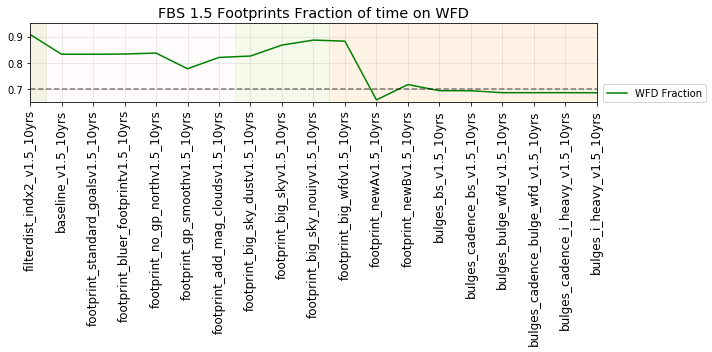

In [21]:
# And note that you can then also pull out other metrics and plot using the same shading

# Metric column names?
m = ['Nvisits All', 
        'Nvisits Long Exp', 
        'Nvisits Long WFD',]
# Grab subset of dataframe and calculate the number we wanted here 
#   .. (the fraction of long exposures which were in the WFD area)
r = '1.5'
d = big['1.5']['Nvisits Long WFD'].loc[families['footprint']] / \
    big['1.5']['Nvisits Long Exp'].loc[families['footprint']]
# Rename the dataframe column to something nicer for the plot
d = pd.DataFrame(d, columns=['WFD Fraction'])

# Plot using our function we defined earlier
plot(d, normed=False, style=styles[mset], figsize=(10, 5))
# Add some extra stuff -- I know from the wfdscale experiments that around 70% time on WFD is about minimum needed
# to squeak by the SRD requirements (and note that SRD fO above is close to requirements for 'pink' runs)
plt.axhline(0.70, color='k', linestyle='--', alpha=0.5)
plt.ylim(0.65, 0.95)
ylims = plt.ylim()
# Add footprint shading
plt.fill_between([0, 0.5], ylims[0], ylims[1], alpha=0.1, color='olive')
plt.fill_between([0.5, 6.5], ylims[0], ylims[1], alpha=0.1, color='mistyrose')
plt.fill_between([6.5, 9.5], ylims[0], ylims[1], alpha=0.1, color='yellowgreen')
plt.fill_between([9.5, 18], ylims[0], ylims[1], alpha=0.1,  color='darkorange')
plt.title(f'FBS {r} Footprints Fraction of time on WFD', fontsize='x-large')
plt.tight_layout()
plt.savefig('footprint_wfdfraction.pdf')

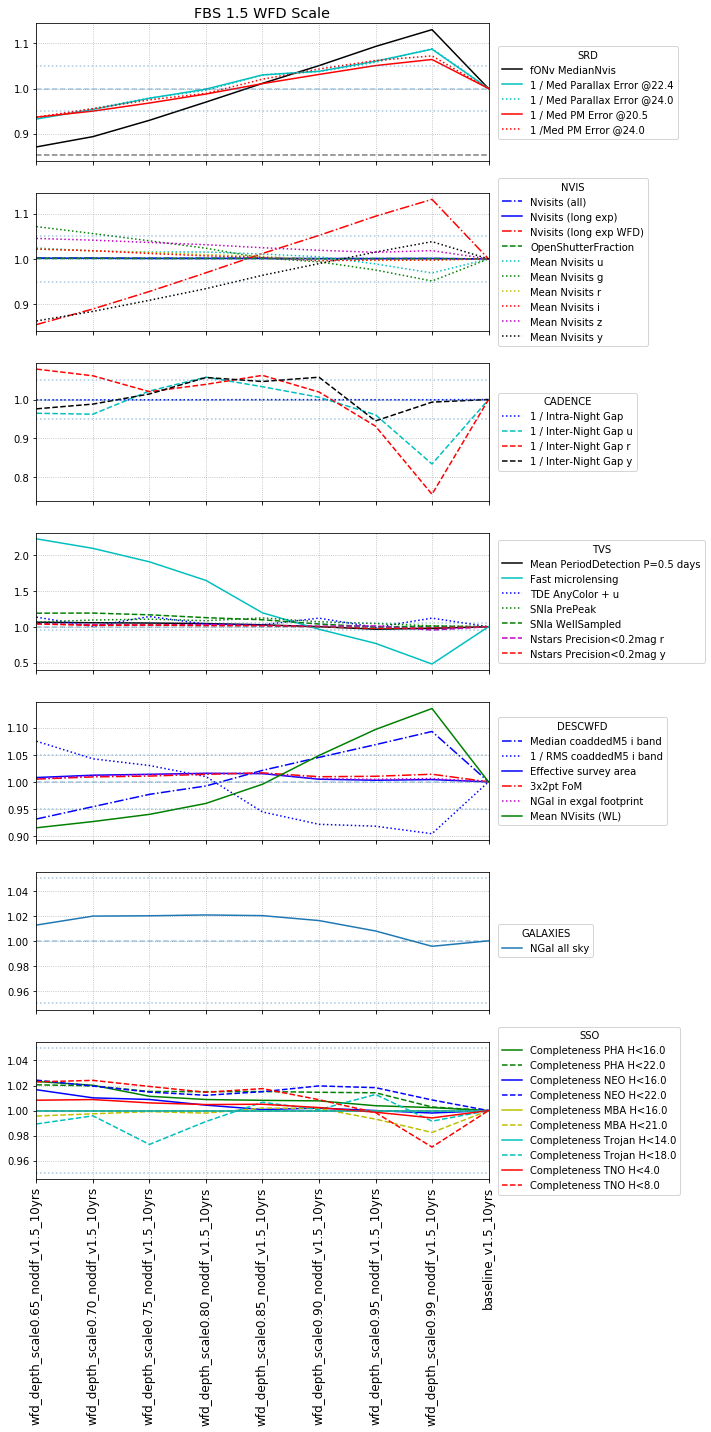

In [26]:
# The WFD scale set is a useful set of runs to see how your metric scales with # of visits in WFD .. 
# BUT note, as the number of visits in WFD drops, those visits go elsewhere (such as to the GP..)
# (which explains the 'fast microlensing' metric results)

family = 'wfdscale'

r = baselinesR[baselines[family]]
srd_fO_cutoff = fO_cutoff(r, family)

plt.figure(figsize=(10, 20))
i = 1
sharex = None
for mset in metrics:
    d = norm_df(big[r][metrics[mset]].loc[families[family]], baselines[family],
                invert_cols=invert_cols[mset], mag_cols=mags_cols[mset])
    d.columns = short_names_norm[mset]
    
    ax = plt.subplot(len(metrics), 1, i, sharex=sharex)
    d.plot(ax=ax, style=styles[mset])
    plt.legend(loc='center left', bbox_to_anchor=(1.01, 0., .9, 1), fancybox=True,
               title=f'{mset.upper()}')
    plt.axhline(0.95, alpha=0.4, linestyle=':')
    plt.axhline(1.0, alpha=0.4, linestyle='--')
    plt.axhline(1.05, alpha=0.4, linestyle=':')
    if mset == 'srd':
        plt.axhline(srd_fO_cutoff, color='k', linestyle='--', alpha=0.5)
    ylims = plt.ylim()
    if ylims[0] > 0.95: 
        ylim[0] = 0.95
    if ylims[1] < 1.05:
        ylim[0] = 1.05
    plt.grid(True, color='k', linestyle=':', alpha=0.3)
    if i == 1:
        plt.title(f'FBS {r} WFD Scale', fontsize='x-large')
        sharex = ax
    i += 1
xnames = d.index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.tight_layout()

# plt.savefig('wfdscale.pdf')

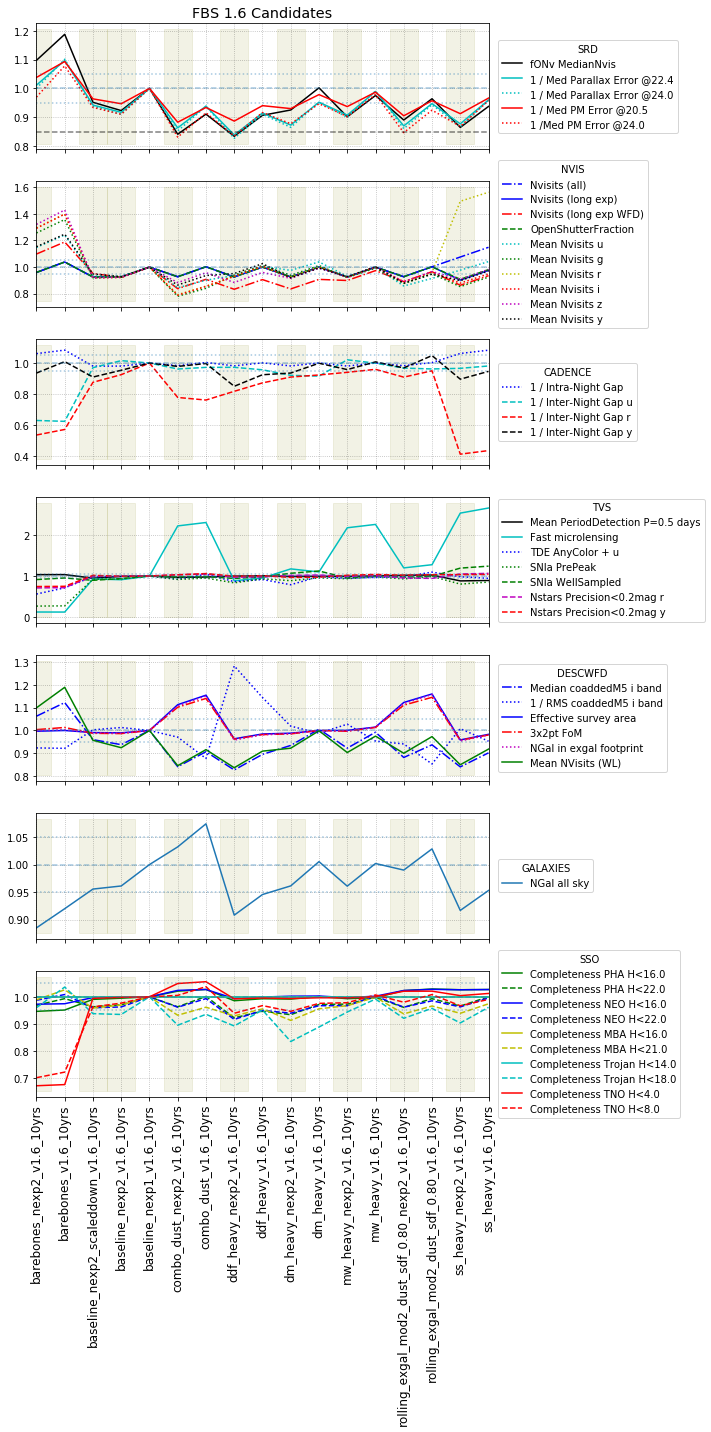

In [27]:
# And one more fancyplot 
# (kind of nice for seeing how to pull out fancier shading automatically if it can match runnames)

family = 'v16'

r = baselinesR[baselines[family]]
srd_fO_cutoff = fO_cutoff(r, family)

xnames = families[family]
nexp2 = np.zeros(len(xnames))
for i, x in enumerate(xnames):
    if 'nexp2' in x:
        nexp2[i] = 1
shadesx1 = np.where(nexp2 == 1)[0] - 0.5
shadesx2 = np.where(nexp2 == 1)[0] + 0.5

plt.figure(figsize=(10, 20))
i = 1
sharex = None

for mset in metrics:
    d = norm_df(big[r][metrics[mset]].loc[families[family]], baselines[family],
                invert_cols=invert_cols[mset], mag_cols=mags_cols[mset])
    d.columns = short_names_norm[mset]
    
    ax = plt.subplot(len(metrics), 1, i, sharex=sharex)
    d.plot(ax=ax, style=styles[mset])
    plt.legend(loc='center left', bbox_to_anchor=(1.01, 0., .9, 1), fancybox=True,
               title=f'{mset.upper()}')
    plt.axhline(0.95, alpha=0.4, linestyle=':')
    plt.axhline(1.0, alpha=0.4, linestyle='--')
    plt.axhline(1.05, alpha=0.4, linestyle=':')
    if mset == 'srd':
        plt.axhline(srd_fO_cutoff, color='k', linestyle='--', alpha=0.5)
    ylims = plt.ylim()
    if ylims[0] > 0.95: 
        ylim[0] = 0.95
    if ylims[1] < 1.05:
        ylim[0] = 1.05
    # shade the nexp2 runs
    for x1, x2 in zip(shadesx1, shadesx2):
        plt.fill_between([x1, x2], ylims[0], ylims[1], alpha=0.1, color='olive')
    plt.grid(True, color='k', linestyle=':', alpha=0.3)
    if i == 1:
        plt.title(f'FBS {r} Candidates', fontsize='x-large')
        sharex = ax
    i += 1
xnames = d.index.values
xi = np.arange(len(xnames))
plt.xticks(xi, xnames, rotation=90, fontsize='large')
plt.tight_layout()

#plt.savefig('v16.pdf')